In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
dataset=pd.read_csv("C:\\Users\\Mukesh\\Downloads\\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [83]:
df=pd.DataFrame(dataset)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [84]:
df.shape

(7787, 12)

In [85]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [86]:
df.dropna(inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4808 entries, 1 to 7783
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4808 non-null   object
 1   type          4808 non-null   object
 2   title         4808 non-null   object
 3   director      4808 non-null   object
 4   cast          4808 non-null   object
 5   country       4808 non-null   object
 6   date_added    4808 non-null   object
 7   release_year  4808 non-null   int64 
 8   rating        4808 non-null   object
 9   duration      4808 non-null   object
 10  listed_in     4808 non-null   object
 11  description   4808 non-null   object
dtypes: int64(1), object(11)
memory usage: 488.3+ KB


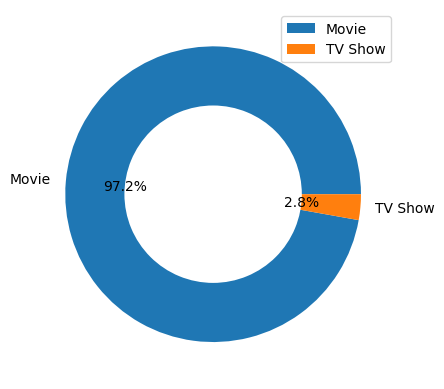

In [88]:
type=df["type"].value_counts().reset_index()
type
plt.pie(x=type["count"],labels=type["type"],autopct="%1.1f%%")
plt.pie([1],radius=0.6,colors="white")
plt.legend(loc=1)
plt.show()

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["type"]=le.fit_transform(df["type"])

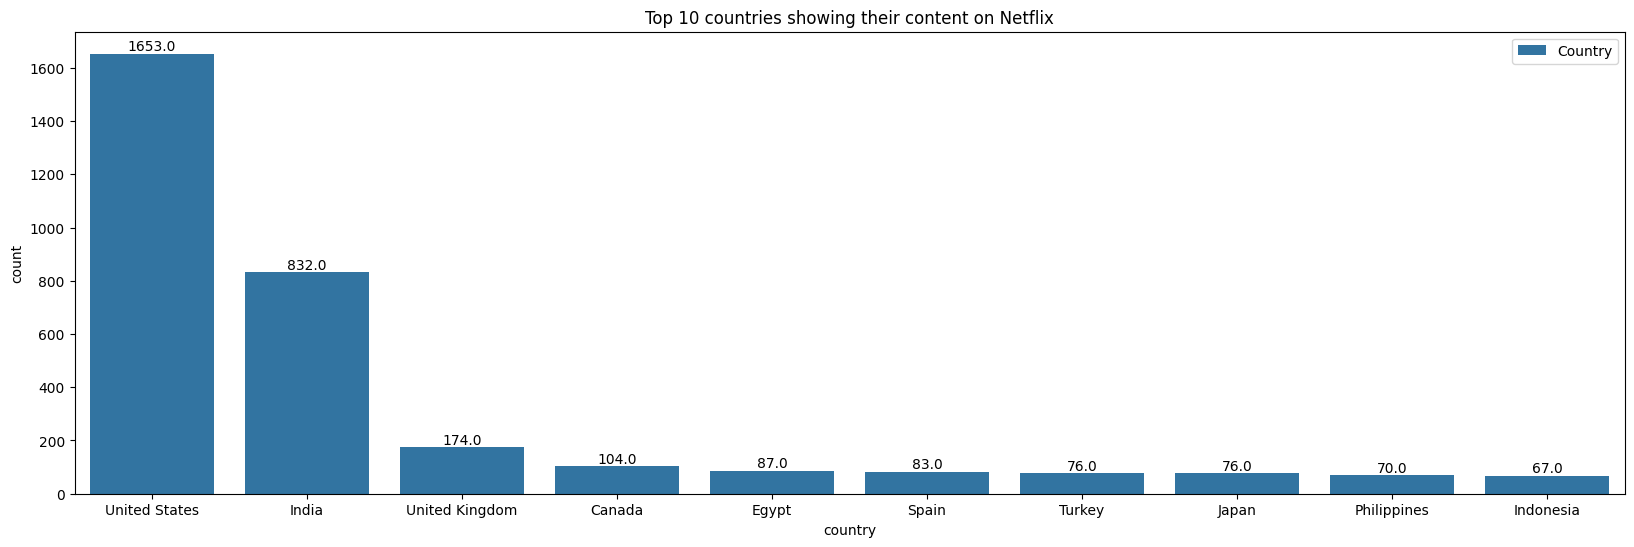

In [90]:
plt.figure(figsize=(20,6))
country_df=df["country"].value_counts().reset_index().head(10)
bar=sns.barplot(x="country",y="count",data=country_df,label="Country")
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Top 10 countries showing their content on Netflix")
plt.legend()
plt.show()

In [91]:
df.drop(["director","cast","country","show_id","title"],axis=1,inplace=True)
df.head()

,type,date_added,release_year,rating,duration,listed_in,description
1,0,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,0,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,0,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,0,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,1,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...


In [92]:
df["date_added"]=pd.DatetimeIndex(df["date_added"])
df["added_year"]=pd.DatetimeIndex(df["date_added"]).year
df["ContentTime_Duration"]=df["added_year"]-df["release_year"]
df["Current_year"]=2025
df["Content_netflixage"]=df["Current_year"]-df["added_year"]
df["Content_realage"]=df["Current_year"]-df["release_year"]
df.head()

,type,date_added,release_year,rating,duration,listed_in,description,added_year,ContentTime_Duration,Current_year,Content_netflixage,Content_realage
1,0,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,0,2025,9,9
2,0,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,7,2025,7,14
3,0,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,8,2025,8,16
4,0,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,12,2025,5,17
5,1,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,1,2025,8,9


In [93]:
df["rating"].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-G', 'TV-PG', 'NR', 'PG', 'G',
       'TV-Y7', 'TV-Y', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [94]:
le=LabelEncoder()
df['rating']=le.fit_transform(df["rating"])

In [95]:
def extract_int(series):
    if "min" in series:
        return int(series.split()[0])
    elif "Season" in series:
        return int(series.split()[0])*120
    else:
        return None
    
df["duration"]=df["duration"].apply(extract_int)

In [96]:
df.head()

,type,date_added,release_year,rating,duration,listed_in,description,added_year,ContentTime_Duration,Current_year,Content_netflixage,Content_realage
1,0,2016-12-23,2016,8,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,0,2025,9,9
2,0,2018-12-20,2011,5,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,7,2025,7,14
3,0,2017-11-16,2009,4,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,8,2025,8,16
4,0,2020-01-01,2008,4,123,Dramas,A brilliant group of students become card-coun...,2020,12,2025,5,17
5,1,2017-07-01,2016,8,120,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017,1,2025,8,9


In [97]:
df.shape

(4808, 12)

In [98]:
import nltk

In [99]:
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mukesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mukesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mukesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Mukesh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [100]:
from nltk.corpus import stopwords
stopword=stopwords.words("english")

In [101]:
from nltk.stem import WordNetLemmatizer
lam=WordNetLemmatizer()

In [102]:
from nltk.tokenize import word_tokenize

In [103]:
import re
def remove_num(text):
    return re.sub(r'\d+',"",text)

df["description"]=df["description"].apply(remove_num)

In [104]:
import string
def cleaned_sentence(text):
    text=text.lower()
    text=text.translate(str.maketrans("","",string.punctuation))
    words=word_tokenize(text)
    clean_word=[lam.lemmatize(word) for word in words if word not in stopword and len(word)>2]
    return clean_word

In [105]:
import nltk

# Download stopwords
nltk.download('stopwords')

# Download punkt tokenizer (if used)
nltk.download('punkt')

# Download WordNet (if used)
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mukesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mukesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mukesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [106]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def cleaned_sentence(text):
    stop_words = set(stopwords.words('english'))
    # Your cleaning code here
    ...


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mukesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [107]:
df["clean_text"] = df["description"].apply(cleaned_sentence)
print(df.shape)

(4808, 13)


In [108]:
! pip install gensim


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
from gensim.models import Word2Vec
import pandas as pd
import string

# Load your dataset
df=pd.read_csv("C:\\Users\\Mukesh\\Downloads\\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

# Preprocess the text
def preprocess(text):
    if isinstance(text, str):
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        return text.split()
    return []

df['clean_text'] = df['description'].apply(preprocess)

# Train Word2Vec model
model = Word2Vec(
    sentences=df['clean_text'],
    vector_size=100,
    sg=0,  # CBOW
    min_count=1,
    window=3,
    seed=42
)

# Get most similar words to 'devastating'
similar_words = model.wv.most_similar("devastating", topn=5)
print(similar_words)


[('different', 0.9983387589454651), ('business', 0.9982770681381226), ('bad', 0.9982650876045227), ('whose', 0.9982585906982422), ('sex', 0.9982376098632812)]


In [110]:
def sentence_vector(text,model):
    vecs=[model.wv[word] for word in text if word in model.wv]
    if not vecs:
        return np.zeros(model.vector_size)
    return np.mean(vecs,axis=0)

df["clean_vector"]=df["clean_text"].apply(lambda x:sentence_vector(x,model))

In [111]:
df["clean_vector"][1].shape

(100,)

In [112]:
X=np.vstack(df["clean_vector"].values)
print(X.shape)
x_df=pd.DataFrame(X,columns=list(range(100)))
x_df=x_df.reset_index(drop=True)

(7787, 100)


In [113]:
df=df.reset_index(drop=True)

In [114]:
x_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.044332,0.038703,-0.097710,0.309988,-0.085812,0.432265,-0.037270,0.591000,-0.145785,-0.307824,...,-0.293087,0.700939,0.505510,-0.286705,0.574752,-0.298448,0.011126,0.206390,-0.410426,-0.453238
1,0.050286,0.019487,-0.064026,0.289786,-0.081204,0.388875,-0.040906,0.521802,-0.108323,-0.257384,...,-0.235958,0.632128,0.519790,-0.244899,0.482454,-0.254071,0.069317,0.253823,-0.381596,-0.436314
2,0.027193,-0.008658,-0.053913,0.276533,-0.019593,0.433806,-0.022055,0.535884,-0.113139,-0.221510,...,-0.227521,0.670827,0.507665,-0.271546,0.493614,-0.274534,0.056921,0.206596,-0.405188,-0.408107
3,0.055266,0.060671,-0.092583,0.309233,-0.111322,0.426858,-0.059767,0.566919,-0.142062,-0.313400,...,-0.307344,0.691682,0.529646,-0.262023,0.568879,-0.268506,0.004939,0.223375,-0.412542,-0.479389
4,0.068221,0.053881,-0.077266,0.285208,-0.117028,0.362940,-0.062523,0.498317,-0.126042,-0.316344,...,-0.272490,0.624692,0.485100,-0.227678,0.491869,-0.245400,0.015968,0.246783,-0.354595,-0.437830


In [115]:
print(df.shape)

(7787, 14)


In [116]:
df=pd.concat([df,x_df],axis=1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,90,91,92,93,94,95,96,97,98,99
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,...,-0.293087,0.700939,0.505510,-0.286705,0.574752,-0.298448,0.011126,0.206390,-0.410426,-0.453238
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,...,-0.235958,0.632128,0.519790,-0.244899,0.482454,-0.254071,0.069317,0.253823,-0.381596,-0.436314
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,...,-0.227521,0.670827,0.507665,-0.271546,0.493614,-0.274534,0.056921,0.206596,-0.405188,-0.408107
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,...,-0.307344,0.691682,0.529646,-0.262023,0.568879,-0.268506,0.004939,0.223375,-0.412542,-0.479389
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,...,-0.272490,0.624692,0.485100,-0.227678,0.491869,-0.245400,0.015968,0.246783,-0.354595,-0.437830


In [117]:
df.shape

(7787, 114)

In [118]:
listt=["listed_in"]
df[listt]

,listed_in
0,"International TV Shows, TV Dramas, TV Sci-Fi &..."
1,"Dramas, International Movies"
2,"Horror Movies, International Movies"
3,"Action & Adventure, Independent Movies, Sci-Fi..."
4,Dramas
...,...
7782,"Dramas, International Movies"
7783,"Dramas, International Movies, Music & Musicals"
7784,"Documentaries, International Movies, Music & M..."
7785,"International TV Shows, Reality TV"


In [119]:
listed_in_df=df["listed_in"].value_counts().reset_index()
listed_in_df

,listed_in,count
0,Documentaries,334
1,Stand-Up Comedy,321
2,"Dramas, International Movies",320
3,"Comedies, Dramas, International Movies",243
4,"Dramas, Independent Movies, International Movies",215
...,...,...
487,"Crime TV Shows, Romantic TV Shows, Spanish-Lan...",1
488,"Crime TV Shows, International TV Shows, Realit...",1
489,"International Movies, Romantic Movies, Sci-Fi ...",1
490,"Stand-Up Comedy & Talk Shows, TV Mysteries, TV...",1


In [120]:
from sklearn.preprocessing import MultiLabelBinarizer
df["genre_listed"]=df["listed_in"].str.lower().str.replace("&","and").str.split(",")
df["genre_listed"]

0       [international tv shows,  tv dramas,  tv sci-f...
1                         [dramas,  international movies]
2                  [horror movies,  international movies]
3       [action and adventure,  independent movies,  s...
4                                                [dramas]
                              ...                        
7782                      [dramas,  international movies]
7783    [dramas,  international movies,  music and mus...
7784    [documentaries,  international movies,  music ...
7785                [international tv shows,  reality tv]
7786                 [documentaries,  music and musicals]
Name: genre_listed, Length: 7787, dtype: object

In [121]:
mlb=MultiLabelBinarizer()
genre_binary=mlb.fit_transform(df["genre_listed"])

In [122]:
genre_df=pd.DataFrame(genre_binary,columns=mlb.classes_)
genre_df

,anime features,children and family movies,classic and cult tv,classic movies,comedies,crime tv shows,cult movies,documentaries,docuseries,dramas,...,sports movies,stand-up comedy,stand-up comedy and talk shows,thrillers,tv action and adventure,tv comedies,tv dramas,tv horror,tv sci-fi and fantasy,tv shows
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7783,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7784,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7785,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
! pip install yellowbrick


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


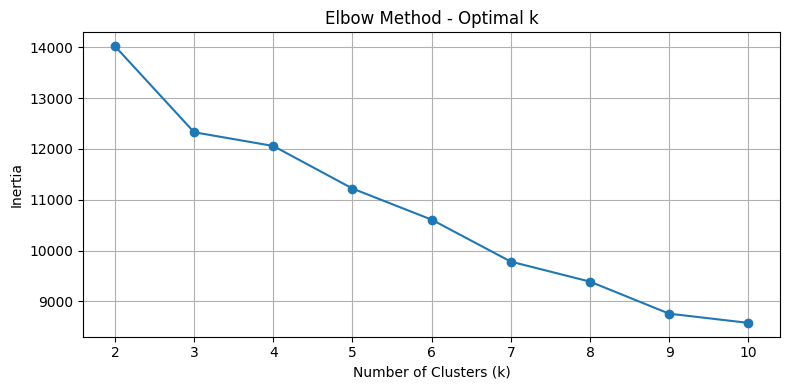

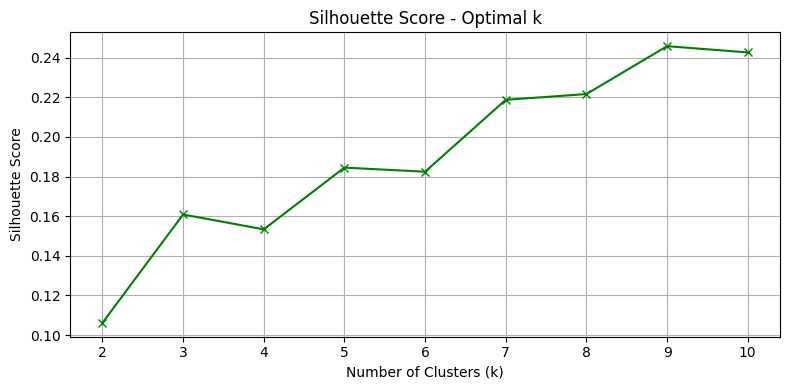

In [133]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'genre_df' is your input features dataframe
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(genre_df)
    inertia.append(model.inertia_)
    silhouette_scores.append(silhouette_score(genre_df, model.labels_))

# Elbow plot (Inertia)
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method - Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Silhouette Score Plot
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='x', color='green')
plt.title("Silhouette Score - Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()



In [134]:
from sklearn.cluster import KMeans
mean=KMeans(n_clusters=6,random_state=42)
mean.fit_predict(genre_df)

array([1, 3, 3, ..., 1, 1, 1])

In [135]:
genre_df["cluster"]=mean.fit_predict(genre_df)

In [136]:
df["genre_cluster"]=genre_df["cluster"]
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,92,93,94,95,96,97,98,99,genre_listed,genre_cluster
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,...,0.505510,-0.286705,0.574752,-0.298448,0.011126,0.206390,-0.410426,-0.453238,"[international tv shows, tv dramas, tv sci-f...",1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,...,0.519790,-0.244899,0.482454,-0.254071,0.069317,0.253823,-0.381596,-0.436314,"[dramas, international movies]",3
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,...,0.507665,-0.271546,0.493614,-0.274534,0.056921,0.206596,-0.405188,-0.408107,"[horror movies, international movies]",3
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,...,0.529646,-0.262023,0.568879,-0.268506,0.004939,0.223375,-0.412542,-0.479389,"[action and adventure, independent movies, s...",4
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,...,0.485100,-0.227678,0.491869,-0.245400,0.015968,0.246783,-0.354595,-0.437830,[dramas],3


In [137]:
df.shape

(7787, 116)

In [138]:
df.columns

Index([      'show_id',          'type',         'title',      'director',
                'cast',       'country',    'date_added',  'release_year',
              'rating',      'duration',
       ...
                    92,              93,              94,              95,
                    96,              97,              98,              99,
        'genre_listed', 'genre_cluster'],
      dtype='object', length=116)

In [140]:
df.drop([
    "date_added", "release_year", "listed_in", "description",
    "added_year", "Current_year", "genre_listed", "clean_text", "clean_vector"
], axis=1, inplace=True, errors="ignore")

df.head()


,show_id,type,title,director,cast,country,rating,duration,0,1,...,91,92,93,94,95,96,97,98,99,genre_cluster
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,TV-MA,4 Seasons,0.044332,0.038703,...,0.700939,0.505510,-0.286705,0.574752,-0.298448,0.011126,0.206390,-0.410426,-0.453238,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,TV-MA,93 min,0.050286,0.019487,...,0.632128,0.519790,-0.244899,0.482454,-0.254071,0.069317,0.253823,-0.381596,-0.436314,3
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,R,78 min,0.027193,-0.008658,...,0.670827,0.507665,-0.271546,0.493614,-0.274534,0.056921,0.206596,-0.405188,-0.408107,3
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,PG-13,80 min,0.055266,0.060671,...,0.691682,0.529646,-0.262023,0.568879,-0.268506,0.004939,0.223375,-0.412542,-0.479389,4
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,PG-13,123 min,0.068221,0.053881,...,0.624692,0.485100,-0.227678,0.491869,-0.245400,0.015968,0.246783,-0.354595,-0.437830,3


In [143]:
final_col = ["type", "rating", "duration"]
existing_cols = [col for col in final_col if col in df.columns]
final_df = df[existing_cols]
final_df.head()


,type,rating,duration
0,TV Show,TV-MA,4 Seasons
1,Movie,TV-MA,93 min
2,Movie,R,78 min
3,Movie,PG-13,80 min
4,Movie,PG-13,123 min


In [145]:
final_df.head()

,type,rating,duration
0,TV Show,TV-MA,4 Seasons
1,Movie,TV-MA,93 min
2,Movie,R,78 min
3,Movie,PG-13,80 min
4,Movie,PG-13,123 min


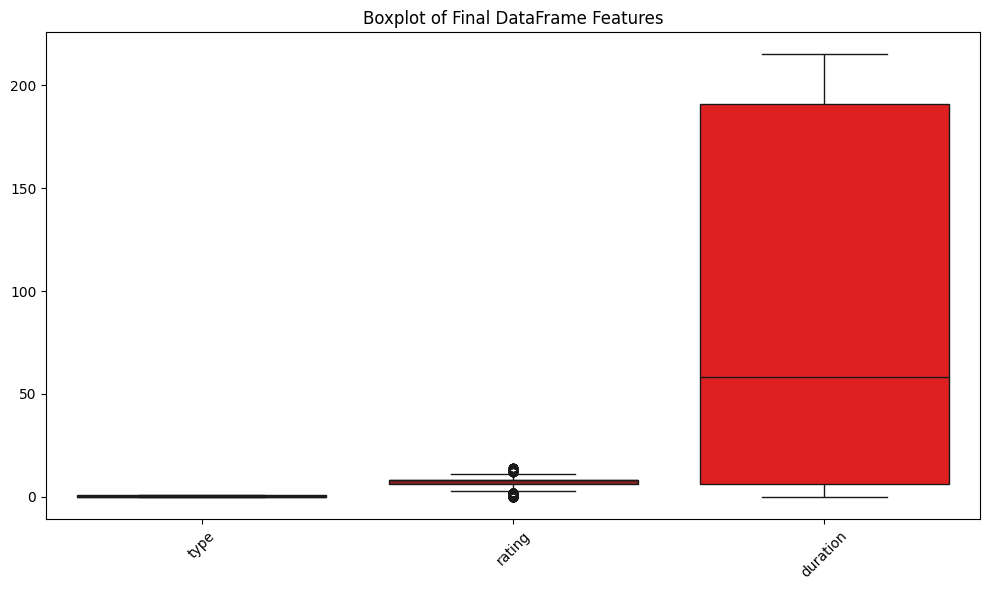

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `final_df` contains the columns you want to visualize
# If it's not numerical yet, you may need to encode 'type' and 'rating'

# Optional: Encode categorical columns for plotting if not already done
from sklearn.preprocessing import LabelEncoder
final_df_encoded = final_df.copy()

for col in ["type", "duration","rating"]:
    if final_df_encoded[col].dtype == "object":
        final_df_encoded[col] = LabelEncoder().fit_transform(final_df_encoded[col])

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_df_encoded, palette="dark:red")
plt.xticks(rotation=45)
plt.title("Boxplot of Final DataFrame Features")
plt.tight_layout()
plt.show()


In [156]:
import warnings 
warnings.filterwarnings("ignore")

def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    min_value = Q1 - 1.5 * IQR
    max_value = Q3 + 1.5 * IQR
    return series.apply(lambda x: max_value if x > max_value else (min_value if x < min_value else x))

# Only apply to numeric columns
for col in final_df.select_dtypes(include=['int64', 'float64']).columns:
    final_df[col] = cap_outliers(final_df[col])


In [157]:
print(final_df.dtypes)

type        object
rating      object
duration    object
dtype: object


In [159]:
final_df=pd.concat([final_df,x_df],axis=1)
final_df["genre_cluster"]=df["genre_cluster"]
final_df.head()

,type,rating,duration,0,1,2,3,4,5,6,...,91,92,93,94,95,96,97,98,99,genre_cluster
0,TV Show,TV-MA,4 Seasons,0.044332,0.038703,-0.097710,0.309988,-0.085812,0.432265,-0.037270,...,0.700939,0.505510,-0.286705,0.574752,-0.298448,0.011126,0.206390,-0.410426,-0.453238,1
1,Movie,TV-MA,93 min,0.050286,0.019487,-0.064026,0.289786,-0.081204,0.388875,-0.040906,...,0.632128,0.519790,-0.244899,0.482454,-0.254071,0.069317,0.253823,-0.381596,-0.436314,3
2,Movie,R,78 min,0.027193,-0.008658,-0.053913,0.276533,-0.019593,0.433806,-0.022055,...,0.670827,0.507665,-0.271546,0.493614,-0.274534,0.056921,0.206596,-0.405188,-0.408107,3
3,Movie,PG-13,80 min,0.055266,0.060671,-0.092583,0.309233,-0.111322,0.426858,-0.059767,...,0.691682,0.529646,-0.262023,0.568879,-0.268506,0.004939,0.223375,-0.412542,-0.479389,4
4,Movie,PG-13,123 min,0.068221,0.053881,-0.077266,0.285208,-0.117028,0.362940,-0.062523,...,0.624692,0.485100,-0.227678,0.491869,-0.245400,0.015968,0.246783,-0.354595,-0.437830,3


In [160]:
final_df.columns=final_df.columns.map(str)

In [161]:
final_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,genre_cluster
count,7787.000000,7787.000000,7787.000000,7787.000000,7787.000000,7787.000000,7787.000000,7787.000000,7787.000000,7787.000000,...,7787.000000,7787.000000,7787.000000,7787.000000,7787.000000,7787.000000,7787.000000,7787.000000,7787.000000,7787.000000
mean,0.051928,0.032868,-0.081213,0.304207,-0.086077,0.423316,-0.050799,0.565348,-0.137430,-0.298476,...,0.693108,0.524909,-0.265612,0.540087,-0.275066,0.028026,0.236795,-0.414871,-0.458924,1.802363
std,0.021521,0.027709,0.032768,0.041355,0.052573,0.075663,0.016991,0.080002,0.025752,0.055237,...,0.106736,0.087115,0.044308,0.078197,0.047655,0.035794,0.036527,0.065690,0.064256,1.440704
min,-0.009603,-0.032855,-0.229607,0.113203,-0.293148,0.137595,-0.122282,0.199526,-0.243712,-0.547019,...,0.231201,0.193837,-0.385851,0.174282,-0.423258,-0.102272,0.098955,-0.621982,-0.660988,0.000000
25%,0.036876,0.012723,-0.096214,0.277382,-0.112079,0.371914,-0.061108,0.515340,-0.154076,-0.332811,...,0.624477,0.466124,-0.297221,0.492006,-0.309049,0.006891,0.212772,-0.461156,-0.504013,1.000000
50%,0.049121,0.029738,-0.074746,0.305830,-0.076782,0.427557,-0.048869,0.569704,-0.137160,-0.294020,...,0.698364,0.528258,-0.268909,0.544437,-0.278376,0.032213,0.238148,-0.417600,-0.461550,1.000000
75%,0.064376,0.049501,-0.059105,0.333147,-0.049528,0.477884,-0.038580,0.620928,-0.120436,-0.260401,...,0.768668,0.585964,-0.236677,0.595066,-0.244551,0.053025,0.261873,-0.371683,-0.418086,3.000000
max,0.148531,0.144230,0.010978,0.444593,0.049092,0.648071,-0.006949,0.817533,-0.028131,-0.085871,...,1.008659,0.793213,-0.089079,0.792174,-0.088283,0.141880,0.363271,-0.140755,-0.176721,5.000000


In [164]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Create a copy
final_df_encoded = final_df.copy()

# Encode categorical columns
for col in final_df_encoded.select_dtypes(include=['object']).columns:
    final_df_encoded[col] = LabelEncoder().fit_transform(final_df_encoded[col])

# Scale only numeric columns
scaler = StandardScaler()
final_df_norm = scaler.fit_transform(final_df_encoded)

# If you want it back as a DataFrame
import pandas as pd
final_df_norm = pd.DataFrame(final_df_norm, columns=final_df_encoded.columns)

final_df_norm.head()


,type,rating,duration,0,1,2,3,4,5,6,...,91,92,93,94,95,96,97,98,99,genre_cluster
0,1.493694,0.486133,0.631633,-0.352965,0.210605,-0.503488,0.139796,0.005032,0.118279,0.796283,...,0.073371,-0.222697,-0.476073,0.443341,-0.490681,-0.472181,-0.832477,0.067662,0.088490,-0.556960
1,-0.669481,0.486133,1.351048,-0.076314,-0.482953,0.524515,-0.348738,0.092686,-0.455221,0.582280,...,-0.571356,-0.058770,0.467509,-0.737064,0.440586,1.153672,0.466208,0.506572,0.351899,0.831339
2,-0.669481,-1.049159,1.130582,-1.149384,-1.498744,0.833158,-0.669216,1.264685,0.138654,1.691751,...,-0.208764,-0.197958,-0.133926,-0.594336,0.011166,0.807312,-0.826823,0.147400,0.790896,0.831339
3,-0.669481,-1.560922,1.176996,0.155133,1.003451,-0.347011,0.121535,-0.480232,0.046823,-0.527825,...,-0.013367,0.054379,0.081004,0.368221,0.137679,-0.645056,-0.367445,0.035452,-0.318513,1.525489
4,-0.669481,-1.560922,-0.725973,0.757126,0.758378,0.120454,-0.459441,-0.588764,-0.798015,-0.690058,...,-0.641031,-0.457005,0.856207,-0.616654,0.622556,-0.336902,0.273459,0.917633,0.328303,0.831339


In [166]:
final_df_norm_df.describe()

,type,rating,duration,0,1,2,3,4,5,6,...,91,92,93,94,95,96,97,98,99,genre_cluster
count,7.787000e+03,7.787000e+03,7.787000e+03,7.787000e+03,7.787000e+03,7.787000e+03,7.787000e+03,7.787000e+03,7.787000e+03,7.787000e+03,...,7.787000e+03,7.787000e+03,7.787000e+03,7.787000e+03,7.787000e+03,7.787000e+03,7.787000e+03,7.787000e+03,7.787000e+03,7.787000e+03
mean,-8.212257e-17,1.058469e-16,-2.737419e-17,-5.657333e-17,9.033483e-17,-6.204816e-17,-7.026042e-17,5.931075e-17,8.577246e-17,4.014881e-17,...,1.012845e-16,-1.423458e-16,-3.923634e-16,-3.047660e-16,-3.850636e-16,-1.003720e-17,-1.665263e-16,-3.649892e-16,-1.715449e-16,9.580967e-17
std,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,...,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00,1.000064e+00
min,-6.694814e-01,-3.607978e+00,-1.074077e+00,-2.859206e+00,-2.372062e+00,-4.528876e+00,-4.618912e+00,-3.938982e+00,-3.776494e+00,-4.207278e+00,...,-4.327860e+00,-3.800661e+00,-2.713866e+00,-4.678264e+00,-3.109878e+00,-3.640493e+00,-3.773936e+00,-3.153046e+00,-3.144869e+00,-1.251110e+00
25%,-6.694814e-01,-5.373948e-01,-1.004456e+00,-6.994377e-01,-7.270817e-01,-4.578265e-01,-6.486997e-01,-4.946306e-01,-6.793972e-01,-6.067690e-01,...,-6.430467e-01,-6.748503e-01,-7.134252e-01,-6.149003e-01,-7.131368e-01,-5.905166e-01,-6.577341e-01,-7.046403e-01,-7.017460e-01,-5.569600e-01
50%,-6.694814e-01,4.861329e-01,-4.010759e-01,-1.304352e-01,-1.129637e-01,1.973684e-01,3.923478e-02,1.768157e-01,5.605539e-02,1.135772e-01,...,4.923922e-02,3.843818e-02,-7.442245e-02,5.563627e-02,-6.946656e-02,1.169720e-01,3.704857e-02,-4.156116e-02,-4.087277e-02,-5.569600e-01
75%,1.493694e+00,4.861329e-01,1.142185e+00,5.784374e-01,6.003060e-01,6.746944e-01,6.998283e-01,6.952426e-01,7.212495e-01,7.191521e-01,...,7.079617e-01,7.009021e-01,6.530820e-01,7.031244e-01,6.403810e-01,6.984518e-01,6.866175e-01,6.574840e-01,6.355860e-01,8.313395e-01
max,1.493694e+00,3.556716e+00,1.420669e+00,4.488995e+00,4.019242e+00,2.813580e+00,3.394845e+00,2.571231e+00,2.970685e+00,2.580881e+00,...,2.956567e+00,3.080087e+00,3.984474e+00,3.223944e+00,3.919729e+00,3.181055e+00,3.462793e+00,4.173112e+00,4.392111e+00,2.219639e+00


In [167]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_df=pca.fit_transform(final_df_norm_df)

In [168]:
pca.explained_variance_ratio_

array([0.59594893, 0.25154732])

In [169]:
pca_df=pd.DataFrame(pca_df,columns=["PCA1","PCA2"])
pca_df.head()
print(pca_df.shape)

(7787, 2)


KMeans

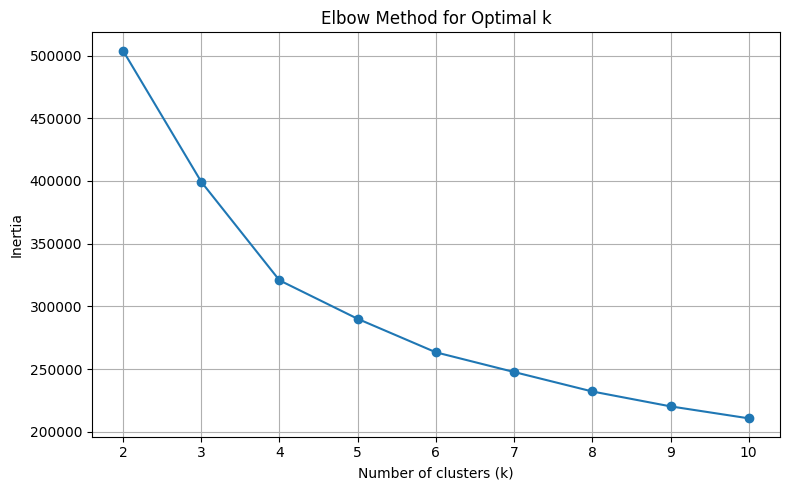

In [172]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 11)

for k in k_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(final_df_norm_df)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()


In [173]:
from sklearn.cluster import KMeans
mean=KMeans(n_clusters=4)
mean.fit_predict(final_df_norm_df)

array([0, 0, 0, ..., 2, 3, 2])

In [174]:
mean.cluster_centers_
print(len(mean.cluster_centers_))

4


In [175]:
mean.labels_

array([0, 0, 0, ..., 2, 3, 2])

In [176]:
from sklearn.metrics import silhouette_score
print(silhouette_score(final_df_norm_df,mean.labels_,metric="manhattan"))

0.30532950038274476


In [177]:
from sklearn.metrics import silhouette_score
print(silhouette_score(final_df_norm_df,mean.labels_,metric="euclidean"))

0.2653748046742632


In [178]:
final_df_norm_df["Cluster"]=mean.fit_predict(final_df_norm_df)
final_df_norm_df.head()

,type,rating,duration,0,1,2,3,4,5,6,...,92,93,94,95,96,97,98,99,genre_cluster,Cluster
0,1.493694,0.486133,0.631633,-0.352965,0.210605,-0.503488,0.139796,0.005032,0.118279,0.796283,...,-0.222697,-0.476073,0.443341,-0.490681,-0.472181,-0.832477,0.067662,0.088490,-0.556960,3
1,-0.669481,0.486133,1.351048,-0.076314,-0.482953,0.524515,-0.348738,0.092686,-0.455221,0.582280,...,-0.058770,0.467509,-0.737064,0.440586,1.153672,0.466208,0.506572,0.351899,0.831339,3
2,-0.669481,-1.049159,1.130582,-1.149384,-1.498744,0.833158,-0.669216,1.264685,0.138654,1.691751,...,-0.197958,-0.133926,-0.594336,0.011166,0.807312,-0.826823,0.147400,0.790896,0.831339,3
3,-0.669481,-1.560922,1.176996,0.155133,1.003451,-0.347011,0.121535,-0.480232,0.046823,-0.527825,...,0.054379,0.081004,0.368221,0.137679,-0.645056,-0.367445,0.035452,-0.318513,1.525489,3
4,-0.669481,-1.560922,-0.725973,0.757126,0.758378,0.120454,-0.459441,-0.588764,-0.798015,-0.690058,...,-0.457005,0.856207,-0.616654,0.622556,-0.336902,0.273459,0.917633,0.328303,0.831339,3


In [179]:
pca_df["labels"]=mean.fit_predict(final_df_norm_df)

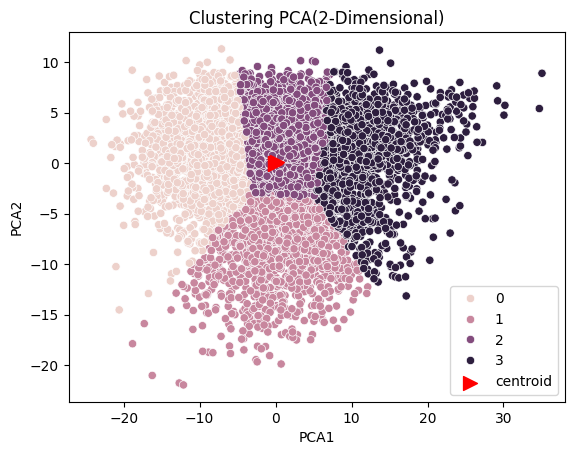

In [180]:
sns.scatterplot(x=pca_df["PCA1"],y=pca_df["PCA2"],hue=pca_df["labels"])
plt.scatter(mean.cluster_centers_[:,0],mean.cluster_centers_[:,1],marker=">",color="red",s=100,label="centroid")
plt.legend()
plt.title("Clustering PCA(2-Dimensional)")
plt.show()

Agglomerative --> Hierarical Clustering

In [181]:
final_df_norm_df.drop(["Cluster"],axis=1,inplace=True)

In [182]:
np.random.seed(42)
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=4)
agg.fit_predict(final_df_norm_df)

array([3, 3, 3, ..., 2, 0, 2], dtype=int64)

In [183]:
agg.labels_

array([3, 3, 3, ..., 2, 0, 2], dtype=int64)

In [184]:
print(silhouette_score(final_df_norm_df,agg.labels_,metric="manhattan"))

0.21920609978417105


In [185]:
print(silhouette_score(final_df_norm_df,agg.labels_,metric="euclidean"))

0.18681230222840137


In [186]:
pca_df.drop(["labels"],axis=1,inplace=True)

In [187]:
pca_df["agg_labels"]=agg.labels_

In [188]:
pca_df.head()

,PCA1,PCA2,agg_labels
0,-0.489024,-1.320610,3
1,3.199341,3.468148,3
2,3.487596,6.393461,3
3,-0.331429,-2.507783,3
4,4.286463,-2.130568,0


In [189]:
agg_centroids=pca_df.groupby("agg_labels")[["PCA1","PCA2"]].mean()
agg_centroids

,PCA1,PCA2
agg_labels,,
0,8.781105,0.880222
1,-8.568990,0.404135
2,0.871213,-9.972850
3,-1.039518,1.870373


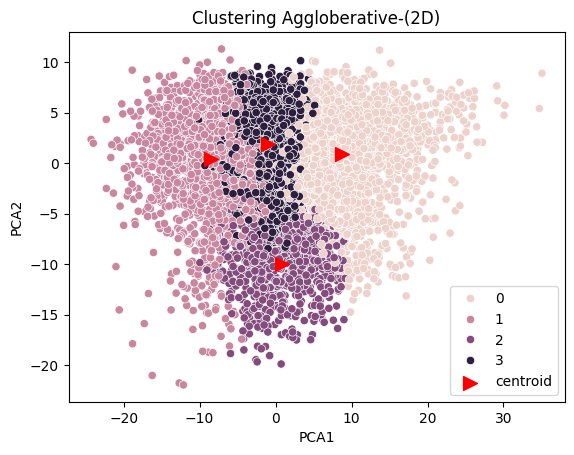

In [190]:
sns.scatterplot(x=pca_df["PCA1"],y=pca_df["PCA2"],hue="agg_labels",data=pca_df)
plt.scatter(agg_centroids["PCA1"],agg_centroids["PCA2"],marker=">",color="red",s=100,label="centroid")
plt.title("Clustering Aggloberative-(2D)")
plt.legend()
plt.show()

DBSCAN

In [191]:
np.random.seed(42)
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(n_jobs=-1,eps=5,min_samples=7)
dbscan.fit_predict(final_df_norm_df)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [192]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [193]:
np.unique(dbscan.labels_)

array([-1,  0], dtype=int64)

In [194]:
noise=np.sum(dbscan.labels_==-1)
print(noise)

16


In [195]:
zero=np.sum(dbscan.labels_==0)
print(zero)

7771


In [196]:
ones=np.sum(dbscan.labels_==1)
print(ones)

0


In [197]:
print(silhouette_score(final_df_norm_df,dbscan.labels_,metric="manhattan"))

0.48882192417129017


In [198]:
print(silhouette_score(final_df_norm_df,dbscan.labels_,metric="euclidean"))

0.4769145998502107


In [199]:
pca_df.drop(["agg_labels"],axis=1,inplace=True )

In [200]:
pca_df.head()

,PCA1,PCA2
0,-0.489024,-1.320610
1,3.199341,3.468148
2,3.487596,6.393461
3,-0.331429,-2.507783
4,4.286463,-2.130568


In [201]:
pca_df["dnscan_labels"]=dbscan.labels_

In [202]:
pca_df.head()

,PCA1,PCA2,dnscan_labels
0,-0.489024,-1.320610,0
1,3.199341,3.468148,0
2,3.487596,6.393461,0
3,-0.331429,-2.507783,0
4,4.286463,-2.130568,0


In [203]:
dbscan_centroid=pca_df.groupby("dnscan_labels")[["PCA1","PCA2"]].mean()
dbscan_centroid

,PCA1,PCA2
dnscan_labels,,
-1,-0.192183,-7.171406
0,0.000396,0.014765


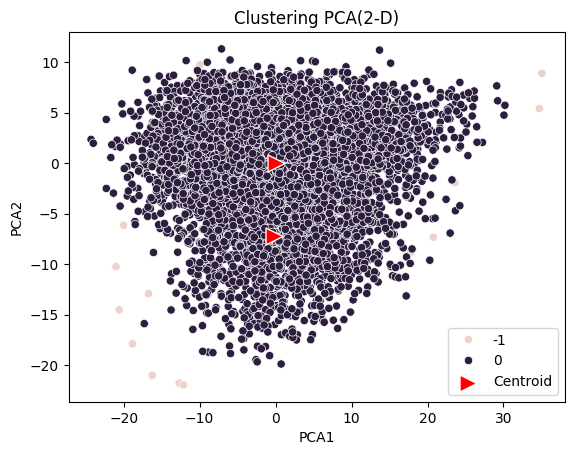

In [204]:
sns.scatterplot(x=pca_df["PCA1"],y=pca_df["PCA2"],hue=pca_df["dnscan_labels"])
sns.scatterplot(x=dbscan_centroid["PCA1"],y=dbscan_centroid["PCA2"],marker=">",color="red",s=150,label="Centroid")
plt.title("Clustering PCA(2-D)")
plt.show()

Comparison

In [205]:
silhouette_score=pd.DataFrame({"KMeans":silhouette_score(final_df_norm_df,mean.labels_,metric="manhattan"),
                               "AgglomerativeClustering":silhouette_score(final_df_norm_df,agg.labels_,metric="manhattan"),
                               "DBSCAN":silhouette_score(final_df_norm_df,dbscan.labels_,metric="manhattan")},index=["Manhattan"])

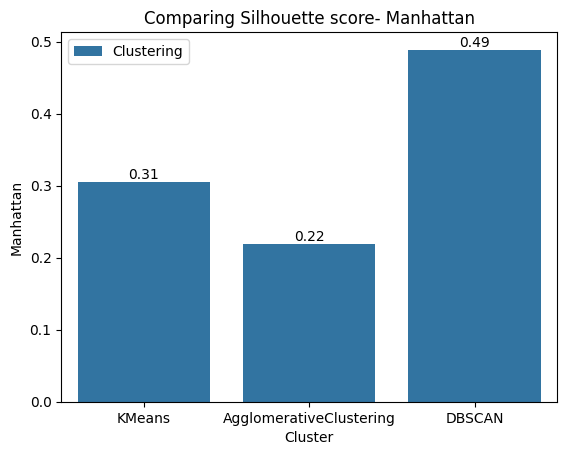

In [206]:
silhouette_score_df=silhouette_score.T.reset_index()
bar=sns.barplot(x="index",y="Manhattan",data=silhouette_score_df,label="Clustering")
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Comparing Silhouette score- Manhattan")
plt.xlabel("Cluster")
plt.legend()
plt.show()

In [207]:
from sklearn.metrics import silhouette_score
silhouette_score_eu=pd.DataFrame({"KMeans":silhouette_score(final_df_norm_df,mean.labels_,metric="euclidean"),
                                  "AgglomerativeClustering":silhouette_score(final_df_norm_df,agg.labels_,metric="euclidean"),
                                  "DBSCAN":silhouette_score(final_df_norm_df,dbscan.labels_,metric="euclidean")},index=["Euclidean"])

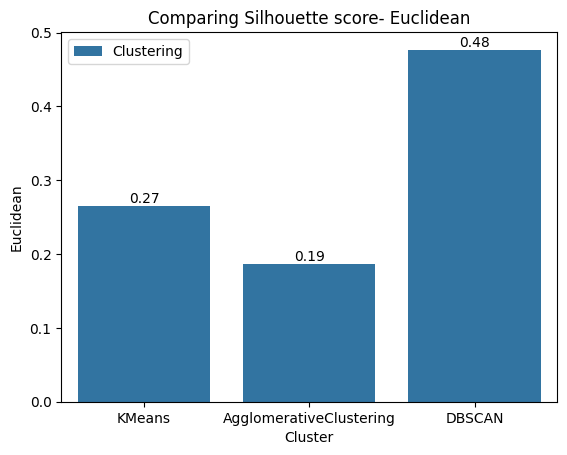

In [208]:
silhouette_score_df=silhouette_score_eu.T.reset_index()
bar=sns.barplot(x="index",y="Euclidean",data=silhouette_score_df,label="Clustering")
for i in bar.patches:
    height=i.get_height()
    plt.text(i.get_x()+i.get_width()/2,height,f"{round(height,2)}",ha="center",va="bottom")
plt.title("Comparing Silhouette score- Euclidean")
plt.legend()
plt.xlabel("Cluster")
plt.show()